**Data Science Course Final Project:** ***Predict H1N1 and Seasonal Flu Vaccines***

**1. Problem Statement**

For the past 2 years, it is evident that the COVID-19 pandemic has forever changed the life of every person on the planet. So my goal was to build a model to predict the likelihood of an individual getting the H1N1 vaccine and/or seasonal flu vaccine. This could be useful for lawmakers and public health services to focus and improve advertising/educational efforts to yield higher vaccination rates and herd immunity.

**2. Approach Overview**

***2.1 Data Source***

The dataset for this model was taken from the National 2009 H1N1 Flu Survey conducted between October 2009 and June 2010 in response to the 2009 H1N1 pandemic. 

***2.2 Target Variables***

The two target variables are the probility of an individual receiving the H1N1 vaccine and the probility of an individual receiving the seasonal flu vaccine. So two models will be created for the variables with ROC UAC used as the scoring metric.

***2.3 Feature Variables***

The dataset is included with 36 feature columns. The columns include a wide variety of categorical variables (such as race, sex, education, locations) and numerical variables to represent knowledge/concern levels along with opinions on vaccine risks and effectiveness. The increasing numerical values corresponds to stronger feelings/opinions on the survey.

There seems to be a large number of missing data that will be dropped for this model. Additionally columns such as hhs_geo_region, employment_industry and employment_occupation will be dropped as well as their variables are represented by random character strings.

***2.4 Model Approach***

The model will take on the classification approach as it is trying to predict a binary variable with 0 being no and 1 being yes to whether or not an individual will be getting a vaccine. I've also decided to go with a Random Forrest Classifier as I believe it will yield the best results and allow me to tune the model's hyperparameters.


**3. Data Preparation**

In [1]:
# Notebook preparations and importing libraries

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from model_inspector import get_inspector

In [2]:
%matplotlib inline

In [3]:
# Loading in the data, using the respondent_id column as index

df_features = pd.read_csv("../assets/data/training_set_features.csv", index_col="respondent_id")
df_labels = pd.read_csv("../assets/data/training_set_labels.csv", index_col="respondent_id")

***3.1 Handling Missing Values***

In [4]:
# Dropping NA values from features and labels

df_features = df_features.dropna()
df_labels = df_labels.dropna()

In [5]:
# Viewing data types for feature columns

print(df_features.dtypes)

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [6]:
# Checking shape of features and labels

print("df_features:", df_features.shape)
print("df_labels:", df_labels.shape)

df_features: (6437, 35)
df_labels: (26707, 2)


***3.2 Cleaning Feature Variables***

In [7]:
# I chose to only include float data types in my feature columns
# as this is a classfication approach to the model. This may be a mistake but I just wanted to reduce the number of features. 

df_features = df_features.select_dtypes(include=['float64'])

df_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,2.0,0.0
11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0
15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,2.0,2.0,4.0,4.0,2.0,2.0,1.0,0.0
26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,5.0,5.0,5.0,5.0,4.0,2.0,1.0,0.0
26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0


***3.3 Exploratory Data Analysis***

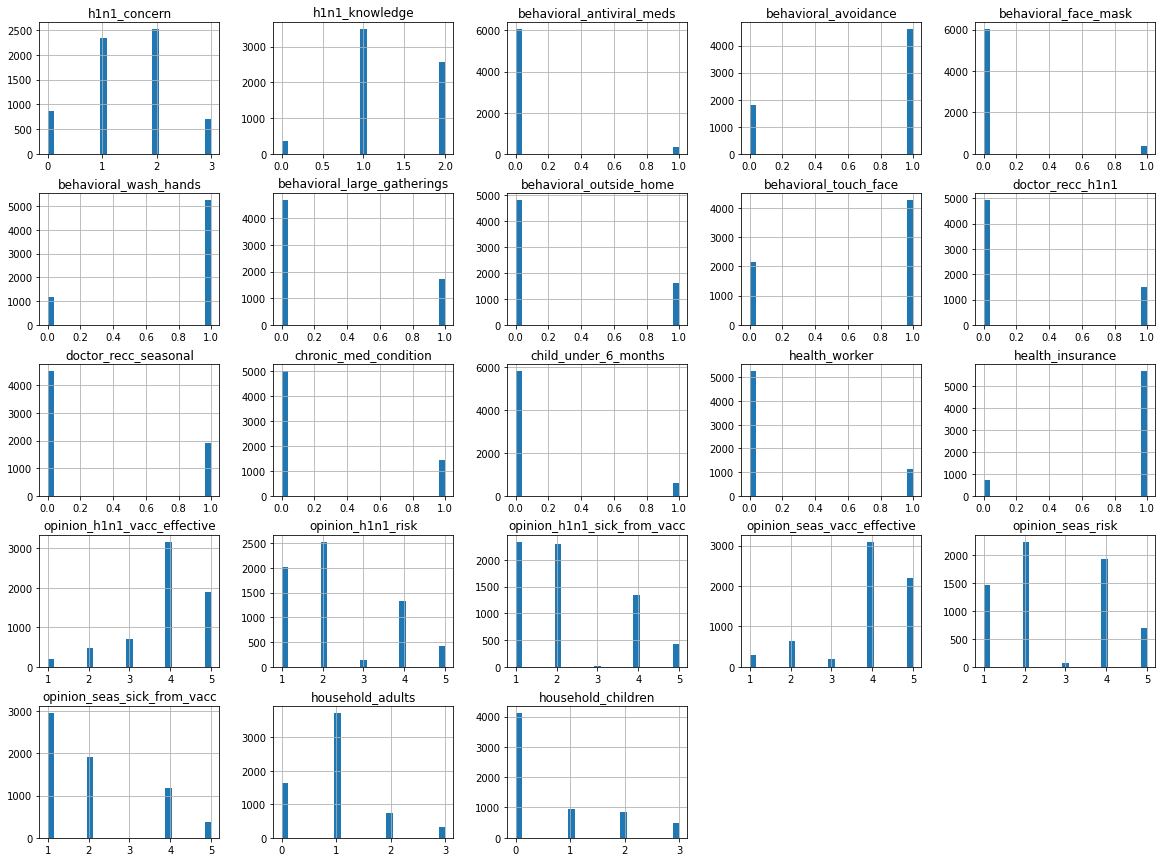

In [8]:
# Viewing distribution of all the features

df_features.hist(figsize=(20,15), bins= 25);

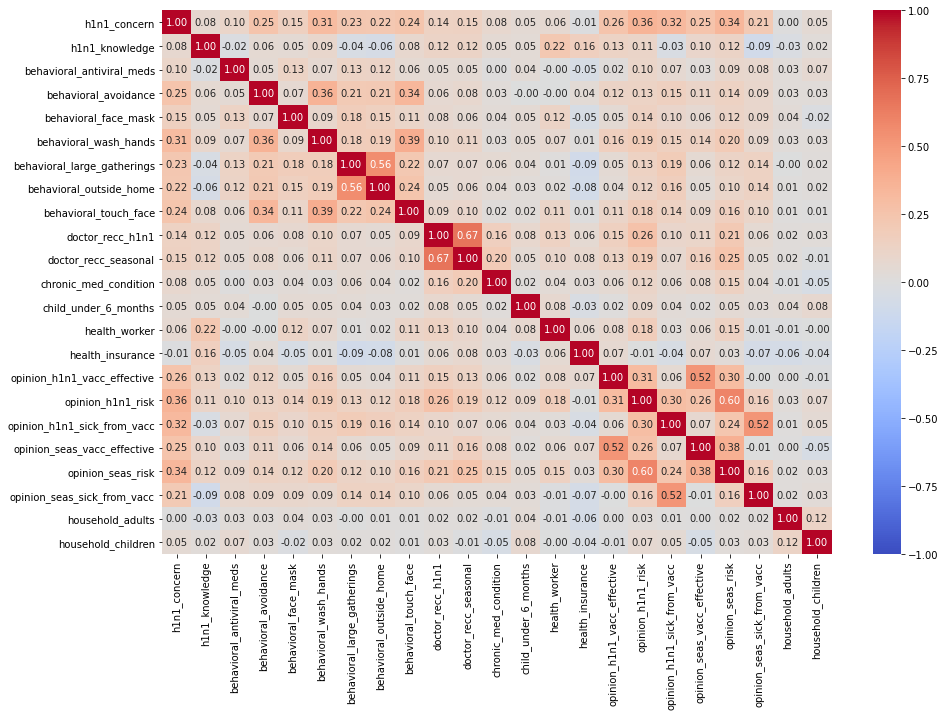

In [9]:
# Viewing heatmap of all features

ax = plt.figure(figsize=(15,10))
sns.heatmap(
    df_features.corr(),
    cmap='coolwarm',
    center=0,
    vmin= -1,
    vmax= 1,
    annot= True,
    fmt='.2f'
);

***3.4 Summary of Final Dataset***

In [10]:
# Creating a joint table to include target variables h1n1_vaccine and seasonal_vaccine 

df_joint = df_labels.join(df_features).dropna()

print("df_joint shape:", df_joint.shape)

df_joint.head(10)

df_joint shape: (6437, 25)


,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
7,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0
10,1,1,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,4.0,1.0,2.0,5.0,4.0,4.0,2.0,0.0
11,1,1,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,2.0,2.0,4.0,2.0,1.0,1.0,2.0
15,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0
17,0,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,2.0,2.0,4.0,4.0,2.0,1.0,1.0,0.0
21,0,1,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,0.0
22,0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,4.0,2.0,2.0,4.0,1.0,2.0,2.0,1.0
34,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,5.0,1.0,2.0,4.0,2.0,1.0,1.0,2.0


**4. Model Building**

***4.1 Random Forest Classifier: H1N1 Vaccine***

In [11]:
# Splitting data into X and y columns with H1N1 vaccine as target variable

X = df_joint.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = df_joint.h1n1_vaccine

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [12]:
# Using GridSearchCV to tune hyperparameters such as max_features and min_samples_leaf

grid1 = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators= 20, n_jobs= -1),
    param_grid={"max_features": [1, .5, .33], "min_samples_leaf": [1, 2, 5, 10, 20, 40, 80]},
    cv=KFold(10, shuffle= True),
    return_train_score= True,
    scoring = "roc_auc"
)
grid1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1),
             param_grid={'max_features': [1, 0.5, 0.33],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40, 80]},
             return_train_score=True, scoring='roc_auc')

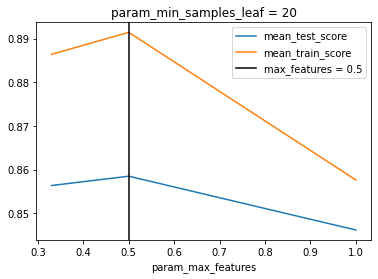

In [13]:
# Plotting and viewing optimal hyperparameters for model

inspector = get_inspector(grid1, X_train, y_train)
ax = inspector.plot_scores_vs_hparam("max_features")

In [14]:
# Re-fitting h1n1_vaccine model with optimal min_samples_leaf and max_features

gridh1 = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators= 20, n_jobs= -1, min_samples_leaf= 20, max_features = 1/2),
    param_grid={},
    cv=KFold(10, shuffle= True),
    return_train_score= True,
    scoring = "roc_auc"
)
gridh1.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(max_features=0.5,
                                              min_samples_leaf=20,
                                              n_estimators=20, n_jobs=-1),
             param_grid={}, return_train_score=True, scoring='roc_auc')

In [15]:
# Displaying mean train and test scores

pd.DataFrame(gridh1.cv_results_)[['mean_train_score', 'mean_test_score']]

,mean_train_score,mean_test_score
0,0.891662,0.857632


In [16]:
# Training and fitting Random Forest Classifier h1n1_vaccine model with optimal hyperparamters

h1n1rfc = RandomForestClassifier(n_estimators= 20, n_jobs= -1, min_samples_leaf= 20, max_features= 1/2)

h1n1rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=20, n_estimators=20,
                       n_jobs=-1)

In [17]:
# Displaying h1n1_vaccine probability predictions for each row

pd.DataFrame(h1n1rfc.predict_proba(X_test))

,0,1
0,0.905730,0.094270
1,0.947399,0.052601
2,0.717236,0.282764
3,0.532222,0.467778
4,0.379497,0.620503
...,...,...
1605,0.206816,0.793184
1606,0.877104,0.122896
1607,0.813813,0.186187
1608,0.929256,0.070744


***4.2 Random Forest Classifier: Seasonal Flu Vaccine***

In [18]:
# Splitting data into X and y columns with seasonal flu vaccine as target variable

X = df_joint.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])
y = df_joint.seasonal_vaccine

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [19]:
# Using GridSearchCV to tune hyperparameters such as max_features and min_samples_leaf

grid2 = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators= 20, n_jobs= -1),
    param_grid={"max_features": [1, .5, .33], "min_samples_leaf": [1, 2, 5, 10, 20, 40, 80]},
    cv=KFold(10, shuffle= True),
    return_train_score= True,
    scoring = "roc_auc"
)
grid2.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=20, n_jobs=-1),
             param_grid={'max_features': [1, 0.5, 0.33],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40, 80]},
             return_train_score=True, scoring='roc_auc')

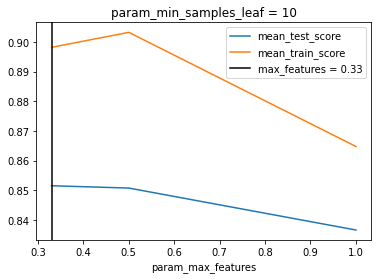

In [20]:
# Plotting and viewing optimal hyperparameters for model

inspector = get_inspector(grid2, X_train, y_train)
ax = inspector.plot_scores_vs_hparam("max_features")

In [25]:
# Re-fitting seasonal_vaccine model with optimal min_samples_leaf and max_features

gridseas = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators= 20, n_jobs= -1, min_samples_leaf= 10, max_features = 1/3),
    param_grid={},
    cv=KFold(10, shuffle= True),
    return_train_score= True,
    scoring = "roc_auc"
)
gridseas.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(max_features=0.3333333333333333,
                                              min_samples_leaf=10,
                                              n_estimators=20, n_jobs=-1),
             param_grid={}, return_train_score=True, scoring='roc_auc')

In [26]:
# Displaying mean train and test scores

pd.DataFrame(gridseas.cv_results_)[['mean_train_score', 'mean_test_score']]

,mean_train_score,mean_test_score
0,0.898158,0.85301


In [27]:
# Training and fitting Random Forest Classifier seasonal_vaccine model with optimal hyperparamters

seasrfc = RandomForestClassifier(n_estimators= 20, n_jobs= -1, min_samples_leaf= 10, max_features= 1/3)

seasrfc.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3333333333333333, min_samples_leaf=10,
                       n_estimators=20, n_jobs=-1)

In [28]:
# Displaying seasonal_vaccine probability predictions for each row

pd.DataFrame(seasrfc.predict_proba(X_test))

,0,1
0,0.228881,0.771119
1,0.952586,0.047414
2,0.323267,0.676733
3,0.062438,0.937562
4,0.496627,0.503373
...,...,...
1605,0.465412,0.534588
1606,0.686338,0.313662
1607,0.735779,0.264221
1608,0.840171,0.159829


**5. Model Evaluation**

It looks like going with the Random Forest Classifier was a good choice compared to my Decision Tree model I did for my initial EDA. The Random Forest model yielded better train and test score results because I was able to tune the hyperparameters to find optimal values to fit and train the dataset. 

Dropping rows with N/A values and columns with Object data types may be a mistake but I wanted to reduce the number of feature columns.